# Aula 3
## Transformações geométricas
As transformações geométricas são aquelas cujo efeito é a **alteração da posição espacial dos pixels** que compõem uma imagem.
As principais operações são:
* Translação;
* Reflexão;
* Cisalhamento;
* Rotação;
* Escala.

(240, 240, 3)


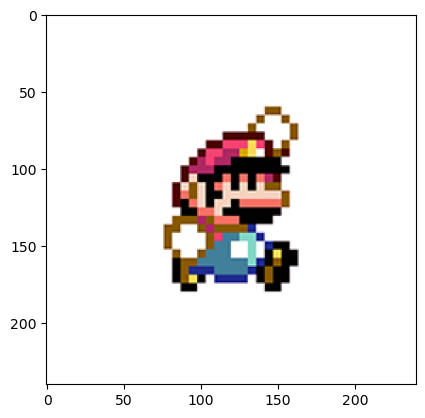

In [4]:
import matplotlib.pyplot as plt
import numpy as np
#para pegar os dados da imagem
mario = np.array(Image.open('mario.png'))[:, :, :3]
(l, c, p) = mario.shape
print(mario.shape)
plt.imshow(mario)

## Translação
* Transladar uma imagem significa mover todos os pixels para uma nova coordenada;
* Pode ser realizada adicionando um valor às suas coordenadas.

$$\begin{pmatrix}
  x' \\ y'
\end{pmatrix} = \begin{pmatrix}
  x \\ y
\end{pmatrix} + \begin{pmatrix}
  d_x \\ d_y
\end{pmatrix}$$

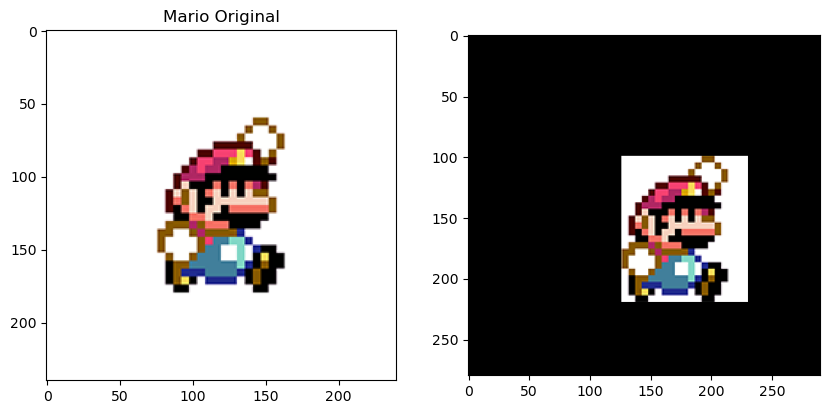

In [9]:
(dx, dy) = (50,  40)
(mario_star_x,mario_start_y, mario_end_x, mario_end_y) = (76, 60, 180, 180)
mario_tr = np.zeros(shape = ( l+dy, c + dx, p ), dtype=np.uint8)#Fundo preto
for i in range(mario_start_y, mario_end_y):
    for j in range(mario_star_x, mario_end_x):
        new_x = j + dx
        new_y = i + dy
        mario_tr[new_y, new_x] = mario[i,j]
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(mario)
plt.title('Mario Original')
plt.subplot(2, 2, 2)
plt.imshow(mario_tr)

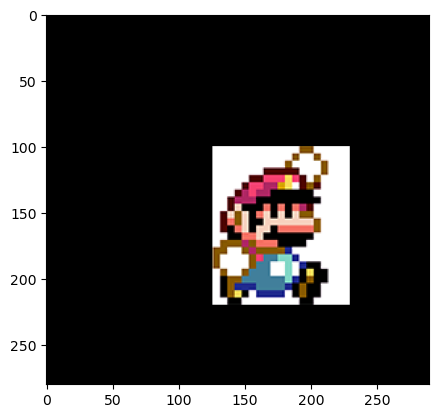

In [ ]:
(dx, dy) = (50, 40)
(mario_start_x, mario_start_y, mario_end_x, mario_end_y) = (76, 60, 180, 180)
mario_tr = np.zeros(shape=(l + dy, c + dx, p), dtype=np.uint8) # Fundo preto.
mario_tr[mario_start_y + dy:mario_end_y + dy,
            mario_start_x + dx:mario_end_x + dx] = mario[mario_start_y:mario_end_y,
                                                         mario_start_x:mario_end_x]
plt.imshow(mario_tr)

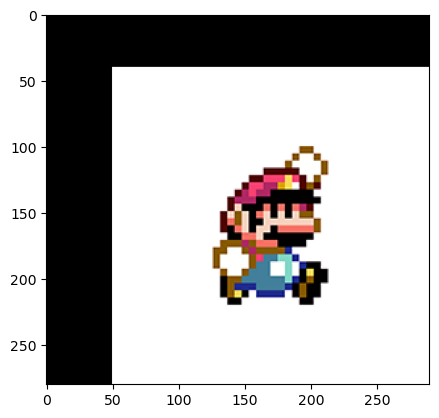

In [12]:
#Translação(iamgem inteira, iterativo)
mario_tr = np.zeros(shape=(l + dy, c + dx, p), dtype=np.uint8)
for i in range(l):
    for j in range(c):
        new_x = j + dx
        new_y = i + dy
        mario_tr[new_y, new_x] = mario[i, j]

plt.imshow(mario_tr)

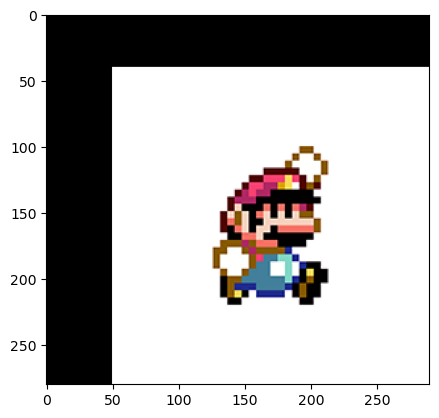

In [13]:
#Translação(imagem inteira, vetorizado)
(dx, dy) = (50, 40)
mario_tr = np.zeros(shape=(l + dy, c + dx, p), dtype=np.uint8)
mario_tr[dy:l + dy, dx:c + dx] = mario # ou mario[:, :]
plt.imshow(mario_tr)

## Reflexao
Espelhar a imagem em relação a um eixo


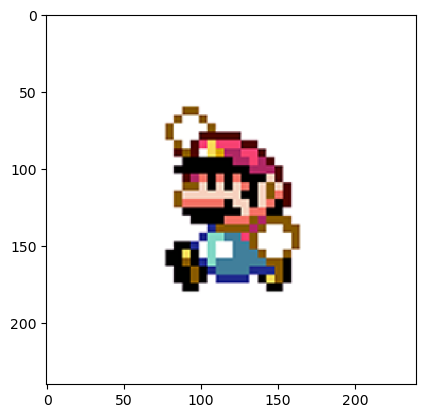

In [14]:
#Reflexao em y
mario_refl = np.zeros(shape = mario.shape, dtype = np.uint8)
for i in range(l):
    for j in range(c):
        new_x = -j
        new_y = i
        mario_refl[new_y, new_x] = mario[i,j]
plt.imshow(mario_refl)

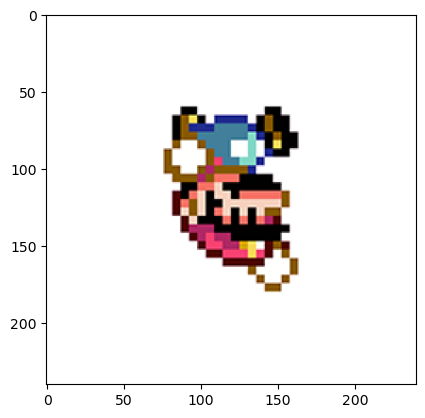

In [15]:
#Reflexao em x
mario_refl = np.zeros(shape = mario.shape, dtype = np.uint8)
# ::-1 significa que o eixo y é invertido
mario_refl = mario[::-1, :, :]
plt.imshow(mario_refl)

## Cisalhamento
* Cisalhar uma imagem é realizar uma distorção nela, dando um efeito de *itálico*;
* A distorção ocorre ponto-a-ponto, ao aplicar-se um deslocamento à coordenada x ou y proporcional ao valor da coordenada y ou x, respectivamente;
* Isto é, y' é influenciado por x e x' é influenciado por y.

$$\begin{pmatrix}
  x' \\ y'
\end{pmatrix} = \begin{pmatrix}
  1 & b_x \\ b_y & 1
\end{pmatrix} \cdot \begin{pmatrix}
  x \\ y
\end{pmatrix}$$
![mario_shear.png](attachment:mario_shear.png)

## Cisalhamento
* Cisalhar uma imagem é realizar uma distorção nela, dando um efeito de *itálico*;
* A distorção ocorre ponto-a-ponto, ao aplicar-se um deslocamento à coordenada x ou y proporcional ao valor da coordenada y ou x, respectivamente;
* Isto é, y' é influenciado por x e x' é influenciado por y.

$$\begin{pmatrix}
  x' \\ y'
\end{pmatrix} = \begin{pmatrix}
  1 & b_x \\ b_y & 1
\end{pmatrix} \cdot \begin{pmatrix}
  x \\ y
\end{pmatrix}$$
![mario_shear.png](C:\Users\vish8\OneDrive\Desktop\P7\C209\Computa--o-gr-fica\TransformacoesGeometricas\mario_shear.png)

## Rotacao

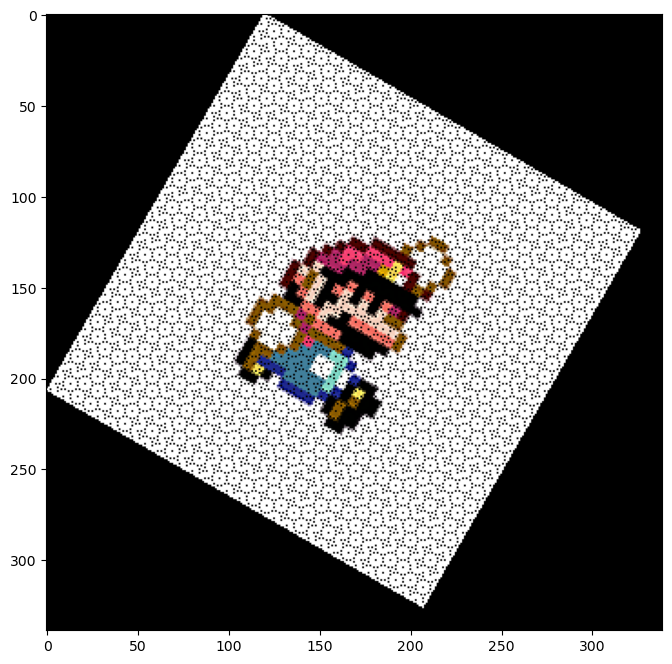

In [20]:
alpha = np.pi / 6 # 30°

ls, cs = int(l * np.sqrt(2)), int(c * np.sqrt(2))
mario_rot = np.zeros((ls, cs, p), dtype=np.uint8)
for i in range(l):
    for j in range(c):
        x = j
        y = i
        
        new_x = int(x * np.cos(alpha) - y * np.sin(alpha) +l/2)
        new_y = int(x * np.sin(alpha) + y * np.cos(alpha))
        
        mario_rot[new_y, new_x] = mario[i, j]

plt.figure(figsize=(8, 8))
plt.imshow(mario_rot)

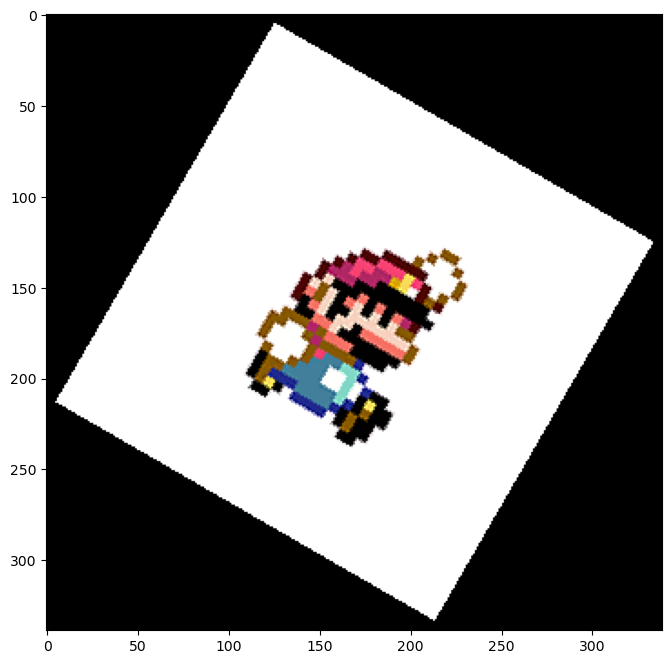

In [21]:
#Rotação interpolação
alpha = np.pi / 6 # 30°

ls, cs = int(l * np.sqrt(2)), int(c * np.sqrt(2))
mario_rot = np.zeros((ls, cs, p), dtype=np.uint8)
for i in range(ls):
    for j in range(cs):
        cx = j - (ls / 2)
        cy = i - (cs / 2)
        
        new_x = int( cx * np.cos(alpha) + cy * np.sin(alpha) + l / 2)
        new_y = int(-cx * np.sin(alpha) + cy * np.cos(alpha) + c / 2)
        
        # Pegar apenas a imagem do Mario na original.
        if 0 <= new_x < c and 0 <= new_y < l:
            mario_rot[i, j] = mario[new_y, new_x]

plt.figure(figsize=(8, 8))
plt.imshow(mario_rot)

## Escala
* Escalonar uma imagem é mudar as dimensões da mesma;
* Em outras palavras, a imagem ou é "esticada" ou é "encolhida";
* A mudança de escalda ocorre pelo produto das coordenadas dos pixels pelo fator de escala.

$$\begin{pmatrix}
  x' \\ y'
\end{pmatrix} = \begin{pmatrix}
  s_x & 0 \\ 0 & s_y
\end{pmatrix} \cdot \begin{pmatrix}
  x \\ y
\end{pmatrix}$$

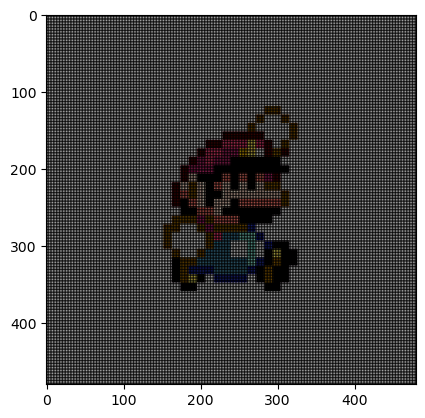

In [22]:
scale_x, scale_y = 2, 2
mario_scale = np.zeros(shape=(l * scale_y, c * scale_x, p), dtype=np.uint8)
for i in range(l):
    for j in range(c):
        new_x = np.round(j * scale_x)
        new_y = np.round(i * scale_y)
        mario_scale[new_y, new_x] = mario[i, j]

plt.imshow(mario_scale)
Image.fromarray(mario_scale).save('mario_scale.png')

* Para resolver o problema de ausência de pixels, faz-se uso da **interpolação**;
* Objetivo é determinar valores desconhecidos a partir dos conhecidos. O resultado estará dentro da faixa de valores conhecidos;
* Algumas técnicas incluem: nearest neighbor, interpolação linear, interpolação bilinear, interpolação bicúbica etc.

### Nearest neighbor
* Vizinho mais próximo;
* Neste método, é adotado que para cada pixel **i, j** da imagem resultante, o valor do vizinho (que fora perdido) corresponde ao do seu vizinho.
![nn_interpolation.png](attachment:nn_interpolation.png)

Se a imagem de entrada, $I$, é $L_{entrada}×C_{entrada}$ e a imagem de saída, $J$, é $L_{saída}×C_{saída}$, então a coordenada do pixel de saída $(l_{saída}, c_{saída})$ é amostrada da coordenada de entrada $(l, c)$ onde
$$l=\lfloor{l_f}\rfloor,$$
$$c=\lfloor{c_f}\rfloor,$$
$$l_f=l_{saída}(L_{entrada}/L_{saída}),$$
$$c_f=c_{saída}(C_{entrada}/C_{saída}).$$

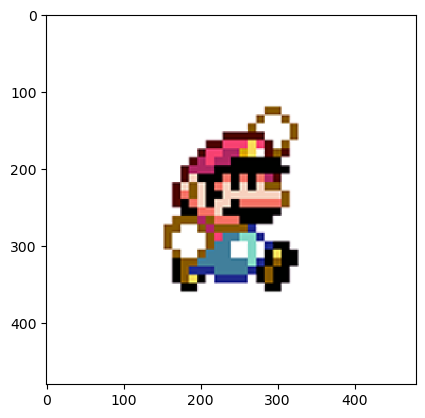

In [23]:
ls, cs = l * 2, c * 2
mario_nn = np.zeros(shape=(ls, cs, p), dtype=np.uint8)

for i in range(ls):
    for j in range(cs):
        new_y = int(np.floor(i * (l / ls)))
        new_x = int(np.floor(j * (c / cs)))
        
        mario_nn[i, j] = mario[new_y, new_x]
plt.imshow(mario_nn)        